# From Prototyping to Production : Building an Efficient Pipeline

How should we take a complex idea, apply AI algorithms on it and deploy it in production? This is a question that is commonly asked by many of our clients at Colaberry. This, as we see is a common area of interest to many Organizations, large & small. This begs an efficient pipeline that is effective in having Data Scientists, Machine Learning Engineers and Data Engineers working in collaboration. Before we jump on to explain how we go about doing it at Colaberry, here is a visualization of some of the popular areas of interest in the AI domain:

<img src="../images/ML_venn_diagram.png", style="width: 700px;"> 

Often Machine Learning Engineers build models that are used by Data Scientists who apply statistical techniques to tweak the models for improving the accuracy of generated outputs. This by no means is the only arrangement that exists across companies. The other arrangements include organizations where Data Science/Machine Learning areas are treated similarly and the gap is fuzzy. Here we assume the former setup and shall talk about how to take a problem in the larger AI domain to production.

We shall consider a problem in the AI domain and see what steps we can take to production. Here is our plan for data ingestion:

<img src="../images/small_data.png", style="width: 700px;"> 

## Building a Credit Classifier

Consider a credit rating system where the objective is to classify the datasets into good credit and bad credit. 

## German Credit Data 

German Credit Data is a dataset in UCI Repositary having information of credit of various customers. Our task is to segregate customers into Good Credit customers and Bad Credit customers. The data is very extensive and consists of 20 attributes, maily categorical. The dataset was provided by Prof. Hofmann and contains categorical/symbolic attributes.

### Spark for Raw Data Ingestion

The raw data needs to be sampled so that we can start out to extract features from it for modeling. 

```
# Load and parse the data
credit_data = spark.read.format("csv").load("/german_credit.txt", sep=" ")
training_sample = credit_data.sample(False, 0.1, 20171001)
```

### Data Cleaning

* We shall start out by adding a new column called 'status' and assigning it as either good/bad from the 'good/bad' column.

In [1]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import scale
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

german_data = pd.read_csv('../data/german.txt', sep=" ")
columns = ['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
           'saving_acc', 'present_emp_since', 'inst_rate', 'personal_status',
           'other_debtors', 'residing_since', 'property', 'age', 'inst_plans', 
           'housing', 'num_credits', 'job', 'dependents', 'telephone', 'foreign_worker', 'good/bad']
german_data.columns = columns
german_data.head(3)

FileNotFoundError: File b'../data/german.txt' does not exist


Please follow the instructions given and use the same variables provided in the instructions.


Filter by using numpy.where() and separate the features into Good/Bad. 

In [21]:
german_data["status"] = np.where(german_data['good/bad'] == 1, "Good", "Bad")
german_data.head()

,checkin_acc,duration,credit_history,purpose,amount,saving_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,good/bad,status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,67,A143,A152,2,A173,1,A192,A201,1,Good
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,22,A143,A152,1,A173,1,A191,A201,2,Bad
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,49,A143,A152,1,A172,2,A191,A201,1,Good
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,45,A143,A153,1,A173,2,A191,A201,1,Good
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,53,A143,A153,2,A173,2,A191,A201,2,Bad


In [22]:
try:
    if isinstance(german_data['status'], pd.core.series.Series):
        ref_assert_var = True
        print('continue')
    else:
        ref_assert_var = False
        print('Please follow the instructions given and use the same variables provided in the instructions.')
except Exception:
    print('Please follow the instructions given and use the same variables provided in the instructions.')

continue


## Exploratory Data Analysis

Perform EDA on this dataset by visualizing:
    * countplot of status
    * Histogram of credit amount, Amount comparison by credit status, Age of Borrowers.
    * Regression plot of duration vs amount.

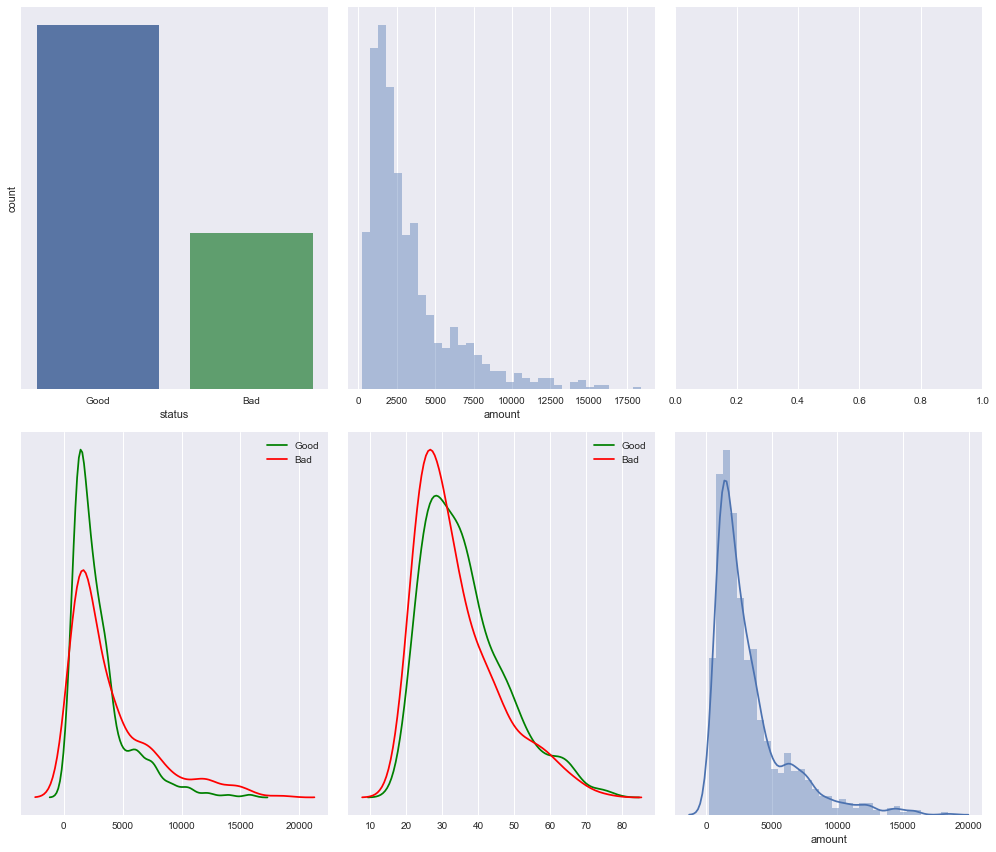

In [30]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 3, figsize=(14, 12))
sns.despine(left=True)

sns.set(style="darkgrid")
sns.countplot(x="status", data=german_data, ax=axes[0, 0])
sns.distplot(german_data.amount, kde = False, ax=axes[0, 1])
sns.kdeplot(german_data[german_data['good/bad'] == 1].amount, color='g',
            label="Good", ax=axes[1, 0])
sns.kdeplot(german_data[german_data['good/bad'] == 2].amount, color='r',
            label="Bad", ax=axes[1, 0])
sns.kdeplot(german_data[german_data['good/bad'] == 1].age, color = 'g', 
            label="Good", ax=axes[1, 1])
sns.kdeplot(german_data[german_data['good/bad'] == 2].age, color = 'r', 
            label="Bad", ax=axes[1, 1])
sns.distplot(credit_features['amount'], ax=axes[1, 2])

# Classify the amount
def amount_class(amount):
    '''
    Classify the amount into different classes.
    Args:
        amount (float): Total amount
    Returns:
        class (int): Type of class.
        
    '''
    if amount < 5000:
        return 1
    elif amount < 10000:
        return 2
    elif amount < 15000:
        return 3
    else:
        return 4

credit_features['amount_class']=credit_features['amount'].map(amount_class)

plt.setp(axes, yticks=[])
plt.tight_layout()

Use seaborn lmplot to generate the regression plot.

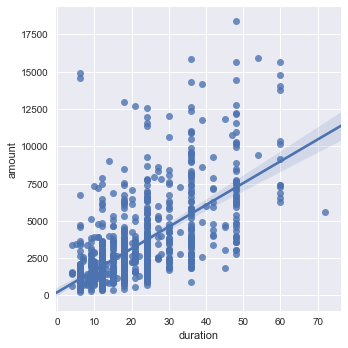

In [31]:
g=sns.lmplot(x='duration', y='amount', fit_reg = True, data=german_data)

In [32]:
try:
    if g.data.amount[0] == 1169:
        ref_assert_var = True
        print('continue')
    else:
        ref_assert_var = False
        print('Please follow the instructions given and use the same variables provided in the instructions.')
except Exception:
    print('Please follow the instructions given and use the same variables provided in the instructions.')

continue


## Feature Extraction

At this step let us extract features and vectorize certain values. Use get_dummies in pandas to extract features.

In [33]:
try:
    german_data = german_data.drop("status", 1)
except:
    print("Status is dropped")
german_data.head(5)
german_data['good/bad'] = german_data['good/bad']-1

features = ['checkin_acc', 'credit_history', 'purpose','saving_acc', 
           'present_emp_since', 'personal_status', 'other_debtors',
           'property','inst_plans', 'housing','job', 'telephone', 'foreign_worker']

Use pd.get_dummies

In [34]:
credit_features = pd.get_dummies(german_data, prefix=features, columns=features)
credit_features.head()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,good/bad,checkin_acc_A11,checkin_acc_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
0,6,1169,4,4,67,2,1,0,1,0,...,1,0,0,0,1,0,0,1,1,0
1,48,5951,2,2,22,1,1,1,0,1,...,1,0,0,0,1,0,1,0,1,0
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42,7882,2,4,45,1,2,0,1,0,...,0,1,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,1,1,0,...,0,1,0,0,1,0,1,0,1,0


In [35]:
try:
    if 'duration' in credit_features.columns:
        ref_assert_var = True
        print('continue')
    else:
        ref_assert_var = False
        print('Please follow the instructions given and use the same variables provided in the instructions.')
except Exception:
    print('Please follow the instructions given and use the same variables provided in the instructions.')

continue


### Prepare Dataset for Modeling

Post feature extraction, the dataset needs to be split for modeling.

* split the data in training:test as 0.7:0.3 ratio and assign it to the variables,
X_train, X_test, y_train, y_test.

In [36]:
X=credit_features.drop('good/bad',1)
Y=credit_features['good/bad']

#Standardizing the dataset
names = list(X.columns.values)
num=names[:5]
cat=names[5:]

#Performing the Scaling funcion
X_scale=pd.DataFrame(scale(X[num]))
X_scale.columns = num
X = pd.concat((X_scale,X[cat]), axis=1)

Use train_test_split() function 

In [37]:
#Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0) 

In [38]:
try:
    if X_train.size == 42700:
        ref_assert_var = True
        print('continue')
    else:
        ref_assert_var = False
        print('Please follow the instructions given and use the same variables provided in the instructions.')
except Exception:
    print('Please follow the instructions given and use the same variables provided in the instructions.')

continue


## Model Selection

Let us apply various classifiers to the same dataset and discover the best performing model.

* Append the CV scores to the list, cv_scores.
* Make predictions on test set with the best model, best_model (var name) and assign the predictions to variable, y_hat.

## Machine Learning Solutions

* We see that the models have not used any causal feautures. Looking at causal features would involve looking up research journals in the area and going for a custom implementation. 
* During the problem discovery phase it is good to look up ML solutions.

['KNN: 0.727143 (0.029589)', 'CART: 0.688571 (0.034876)', 'NB: 0.698571 (0.082919)', 'SVM: 0.731429 (0.045981)']


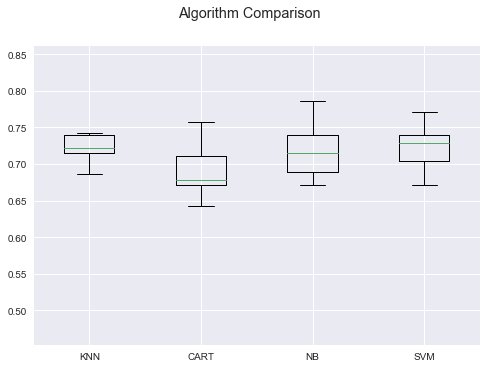

In [39]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
seed = 7
scoring = 'accuracy'
cv_scores = []
names = []
accuracy_scores = list()

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    cv_scores.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    pd.DataFrame(accuracy_scores.append(msg))
    
#Printing the accuracy achieved by each model    
print(accuracy_scores)

#PLotting the model comparision as box plot
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(cv_scores)
ax.set_xticklabels(names)
plt.show()

Use .fit and .predict functions

In [40]:
# Make predictions on Test dataset using SVM.
best_model = SVC()
best_model.fit(X_train, y_train)
y_hat = best_model.predict(X_test)
print(y_hat)

[1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 1]


In [41]:
try:
    if best_model.kernel == 'rbf':
        ref_assert_var = True
        print('continue')
    else:
        ref_assert_var = False
        print('Please follow the instructions given and use the same variables provided in the instructions.')
except Exception:
    print('Please follow the instructions given and use the same variables provided in the instructions.')

continue


## Validation & Reports

We can see that SVM gives us best accuracy, hence we will use it in production. We have printed the confusion matrix and Classification report of the model.

* Compute Accuracy Score and assign it to variable, svm_score.

In [172]:
#Printing Accuracy, Confusion Matrix and Classification report

Use accuracy_score, confusion_matrix, classification_report functions.

In [42]:
svm_score = accuracy_score(y_test, y_hat)
print(svm_score)
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat))

0.75
[[197  17]
 [ 58  28]]
             precision    recall  f1-score   support

          0       0.77      0.92      0.84       214
          1       0.62      0.33      0.43        86

avg / total       0.73      0.75      0.72       300



In [43]:
try:
    if svm_score == 0.75:
        ref_assert_var = True
        print('continue')
    else:
        ref_assert_var = False
        print('Please follow the instructions given and use the same variables provided in the instructions.')
except Exception:
    print('Please follow the instructions given and use the same variables provided in the instructions.')

continue


## Scaling to Big Data

Next is moving to production. Since we have already done cleaning in the experiments phase, let us borrow some portions of data cleaning build out the ingestion portion. We shall use a python notebook to experiment and setup the ingestion pipeline.

* Copy the dataframe map functions and other related data cleaning regular expressions to Spark.
* Pandas dataframe & Spark dataframes have similar functions.
* Save ingested data, sample.
* Save feature vectors, feature sample.

<img src="../images/data_ingestion.png", style="width: 400px;"> 

### Data Ingestion Spark Module

* The module uses regular expressions, map, reduce functions in spark.

```
# display(dbutils.fs.ls("dbfs:/FileStore/tables/ohvubrzw1507843246878/"))
from pyspark.mllib.classification import SVMWithSGD, SVMModel
from pyspark.mllib.regression import LabeledPoint
from pyspark.sql import SQLContext
from copy import deepcopy


sqlContext = SQLContext(sc)
credit_df = spark.read.format("csv").option("header", "true").option("inferSchema", "True").load("dbfs:/FileStore/tables/ohvubrzw1507843246878/german_credit.csv")

credit_df_sample = credit_features.sample(False, 1e-2, 20171010)
credit_df.write.parquet("dbfs:/FileStore/tables/credit_df.parquet")
credit_df_sample.write.parquet("dbfs:/FileStore/tables/credit_df_sample.parquet")


credit_data = credit_df.rdd
feature_cols = credit_df.columns
target = 'Creditability'
feature_cols.pop(0)

def amount_class(amount):
    '''
    Classify the amount into different classes.
    Args:
        amount (float): Total amount
    Returns:
        class (int): Type of class.
        
    '''
    if amount < 5000:
        return 1
    elif amount < 10000:
        return 2
    elif amount < 15000:
        return 3
    else:
        return 4
        

credit_data_new =  credit_data.map(lambda row: (row, amount_class(row['Credit Amount'])))
credit_data_new.take(5)


```

## Spark MLLib

Use the Spark Machine Learning Library to train the SVM on a sample of the dataset. 
* Increase sample size as the training succeeds.
* Ingest all data

<img src="../images/scale_bd.png", style="width: 500px;"> 

```
def features(row):
  '''
  Gathers features from the dataset.
  Args:
    row (rdd): Each row in the dataset.
  Returns:
    (LabeledPoint): Labeled Point of each row.
    
  '''
  feature_map = row.asDict()
  label = float(feature_map['Creditability'])
  feature_list = [float(feature_map[feature]) for feature in feature_cols]
  return LabeledPoint(label, feature_list)


credit_features = credit_data.map(features)
credit_features_df = credit_features.toDF()
credit_features_df.write.parquet("dbfs:/FileStore/tables/credit.parquet")

# Sample the features and save it.
credit_sample_df = credit_features.sample(False, 1e-2, 20171010)
credit_sample_df.write.parquet("dbfs:/FileStore/tables/credit_sample.parquet")


# Read the credit data features
credit_features = sqlContext.parquetFile('dbfs:/FileStore/tables/credit.parquet')
model = SVMWithSGD.train(credit_features, iterations=100)

# Evaluating the model on training data
labels_preds = lp.map(lambda p: (p.label, model.predict(p.features)))
trainErr = labels_preds.filter(lambda lp: lp[0] != lp[1]).count() / float(lp.count())
print("Training Error = " + str(trainErr))

# Print the coefficients and intercept for linearsSVC
print("Coefficients: " + str(model.weights))
print("Intercept: " + str(model.intercept))

# Save and load model
model.save(sc, "credit/SVMWithSGDModel")

```

## Package the Modules & Submit

* We now have a data ingestion module & Deployments of the App -> Data Engineers
* Data Science Experiments -> Data Scientists
* Machine Learning Spark code + Data Science Experiments -> ML Engineers
* spark-submit gcclassify.py --args

In [179]:
# Load the model

Continue

In [180]:
# continue